<a href="https://colab.research.google.com/github/Abdullah2020/Hamoye_StageE/blob/master/Hamoye_StageE_TagAlong_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **TIME SERIES ANALYSIS & FORECAST ON ELECTRICITY CONSUMPTION FROM 2010 TO 2021**

In this quiz, we’ll explore and build time series forecasting models for measurements of electricity prices of a District given the total amount of Electricity consumed in that District from 2010 to 2021.

**Data Set Information:**

The archive contains 92,016 measurements of electricity data gathered between September 2010 and February 2021.

Notes:
The dataset is sampled on an hourly basis. It has the following features:

**Attribute Information:**

*  FullDate: Date in format yyyy-mm-dd hh:mm:ss
*  ElecPrice: Prices of electricity charged in Kw per hour
*  Gas Price: power generated was done via a gas power plant, gas price is the *  price of gas at time-T
*  SysLoad: Total Load on system or Power consumed at time-T
*  Tmax: maximum temperature at time-T

**Import Libraries**

**Pip install pystan** AND **pip install fbprophet:** These libraries are required to use the Prophet model that is already available under the fbprophet library.

In [ ]:
!pip install pystan~=2.14

In [ ]:
!pip install fbprophet

In [3]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

#time series
from statsmodels.tsa.stattools import adfuller    
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARIMA
from fbprophet import Prophet

from datetime import datetime

print("Setup Completed...!!!")

Setup Completed...!!!


In [4]:
custom_date = lambda x: datetime.strptime(x, "%Y-%m-%d %H:%M:%S")

**Load Dataset**

In [5]:
url = "https://raw.githubusercontent.com/Abdullah2020/Hamoye_StageE/master/Time_series_analysis_and_forecast_DATASET.csv"

Electric_df = pd.read_csv(url, low_memory=False,
                       infer_datetime_format=True, parse_dates=['FullDate'],
                       date_parser=custom_date, index_col=["FullDate"])


**Let understand our dataset**

In [6]:
Electric_df.head()

,Tmax,SysLoad,GasPrice,ElecPrice
FullDate,,,,
2010-09-01 00:00:00,15.8,1688.215,3.69,23.710
2010-09-01 01:00:00,15.8,1669.195,3.69,22.635
2010-09-01 02:00:00,15.8,1491.980,3.69,22.565
2010-09-01 03:00:00,15.8,1330.760,3.69,18.910
2010-09-01 04:00:00,15.8,1247.940,3.69,18.030


In [7]:
Electric_df.shape

(92016, 4)

In [8]:
Electric_df.isna().sum()

Tmax         0
SysLoad      0
GasPrice     0
ElecPrice    0
dtype: int64

In [9]:
Electric_df.describe()

,Tmax,SysLoad,GasPrice,ElecPrice
count,92016.000000,92016.000000,92016.000000,92016.000000
mean,231.696688,797.623357,6.016163,65.798356
std,4562.128748,613.520156,2.608116,213.144084
min,9.900000,-1596.810100,0.000000,-924.820000
25%,17.300000,417.119800,3.936900,31.543750
50%,21.900000,856.467925,5.165600,48.715000
75%,27.600000,1221.293675,8.023300,76.495000
max,99999.900000,3264.166300,29.990000,14700.000000


In [10]:
Electric_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 92016 entries, 2010-09-01 00:00:00 to 2021-02-28 23:00:00
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Tmax       92016 non-null  float64
 1   SysLoad    92016 non-null  float64
 2   GasPrice   92016 non-null  float64
 3   ElecPrice  92016 non-null  float64
dtypes: float64(4)
memory usage: 3.5 MB


**Question 11**

Resample the data from an hour sampling rate to a daily sampling rate (i.e sum over the hours for each day). Which of the following is a plot of ElecPrice over time?

In [11]:
#downsample data points
Electric_df = Electric_df.resample('D').sum()
Electric_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3834 entries, 2010-09-01 to 2021-02-28
Freq: D
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Tmax       3834 non-null   float64
 1   SysLoad    3834 non-null   float64
 2   GasPrice   3834 non-null   float64
 3   ElecPrice  3834 non-null   float64
dtypes: float64(4)
memory usage: 149.8 KB


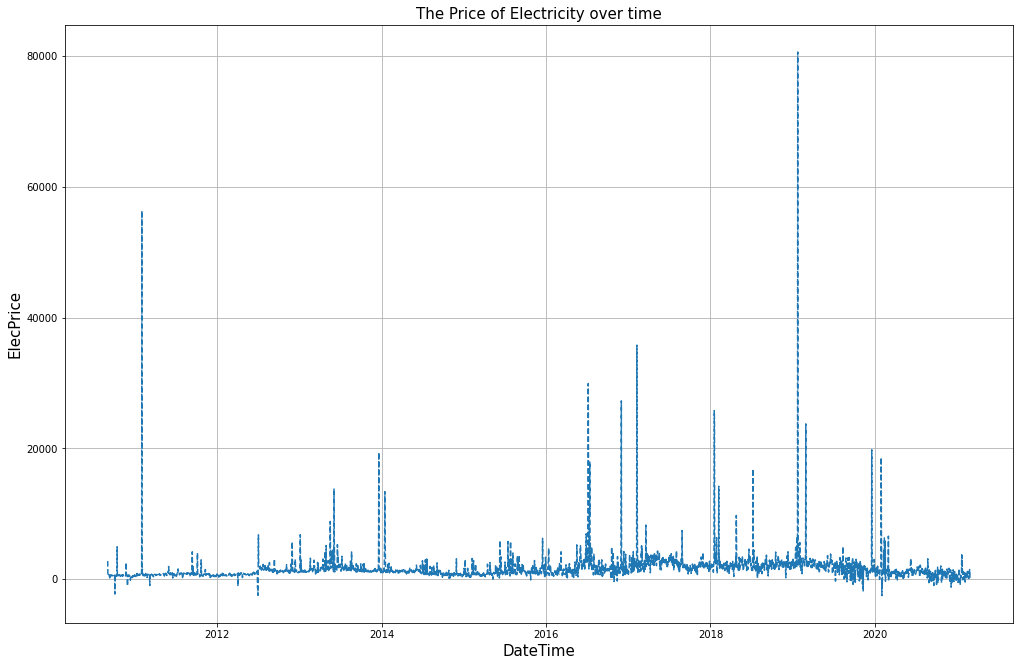

In [18]:
#plot of the daily global_active_power over time
plt.figure(figsize=(17,11))
plt.plot(Electric_df.index, Electric_df.ElecPrice, '--')
plt.grid()
plt.xlabel('DateTime', fontsize = 15)
plt.ylabel('ElecPrice', fontsize = 15)
plt.title('The Price of Electricity over time', fontsize = 15)
plt.show()

**Question 12**

Using the Augmented Dicky Fuller test (ADF), what is the P-value of the SysLoad and GasPrice of the resampled Data set, to 6 decimal places?

In [19]:
!pip install statsmodels
from statsmodels.tsa.stattools import adfuller

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [20]:
adf_result = adfuller(Electric_df['SysLoad'])
print(f'The p-value of SysLoad = : {round(adf_result[1],6)}')

The p-value of SysLoad = : 0.004254


In [21]:
adf_result = adfuller(Electric_df['GasPrice'])
print(f'The p-value of GasPrice =: {round(adf_result[1],6)}')

The p-value of GasPrice =: 0.045027


**Question 13**

Using the Augmented Dicky Fuller test (ADF) what are the 10% and 5% critical values of GasPrice and ElecPrice of the resampled Data set, to 4 decimal places?

In [22]:
#GasPrice
adf_result = adfuller(Electric_df['GasPrice'])
print(f'ADF Statistic: {adf_result[0]}')
print('Critical Values :')

for k, v in adf_result[4].items():
 print(f'{k} : {round(v,4)}')

ADF Statistic: -2.90276669716518
Critical Values :
1% : -3.4321
5% : -2.8623
10% : -2.5672


In [23]:
#ElecPrice
adf_result = adfuller(Electric_df['ElecPrice'])
print(f'ADF Statistic: {adf_result[0]}')
print('Critical Values:')

for k, v in adf_result[4].items():
 print(f'{k} : {round(v,4)}')

ADF Statistic: -8.269053866873803
Critical Values:
1% : -3.4321
5% : -2.8623
10% : -2.5672


# **QUESTION 14 - 16**

Using the daily sampling rate (sum), divide the data into a train and test set. The first 2757 days is your train set and the last (x-2757) days is your test set. Where x is the length of the dataset. Use Facebook Prophet to train a Univariate time series model using the FullDate column as (‘dt’ or ‘ds’) and ElecPrice as ( ‘y’). Answer question 14 - 16

In [24]:
# reset index
Electric_df_daily = Electric_df.reset_index()
Electric_df_daily.head()

,FullDate,Tmax,SysLoad,GasPrice,ElecPrice
0,2010-09-01,379.2,41565.380,88.56,2751.700
1,2010-09-02,369.6,38898.990,88.56,570.810
2,2010-09-03,439.2,41665.760,106.80,504.975
3,2010-09-04,328.8,35638.085,81.36,502.275
4,2010-09-05,357.6,35611.410,106.80,500.555


In [25]:
# select columns for predictive model
model_data = Electric_df_daily[['FullDate', 'ElecPrice']]

#rename columns to 'ds' and 'y' respectively
model_data = model_data.rename(columns={'FullDate':'ds', 'ElecPrice':'y'})

model_data.head()

,ds,y
0,2010-09-01,2751.700
1,2010-09-02,570.810
2,2010-09-03,504.975
3,2010-09-04,502.275
4,2010-09-05,500.555


In [26]:
# assign train and test data
train = model_data[:2757]
test = model_data[2757:]

In [27]:
print('train shape', train.shape)
print('test shape', test.shape)

train shape (2757, 2)
test shape (1077, 2)


In [28]:
train.reset_index(inplace=True)
test.reset_index(inplace=True)

In [29]:
train.dtypes

index             int64
ds       datetime64[ns]
y               float64
dtype: object

**Facebook Prophet model prediction**

In [30]:
model = Prophet() 

model.fit(train[['ds', 'y']])

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [31]:
test_pred = test[['ds']]
forecast = model.predict(test_pred)
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2018-03-20,2691.764386,335.055948,4930.087149,2691.764386,2691.764386,-155.426892,-155.426892,-155.426892,9.749221,9.749221,9.749221,-165.176114,-165.176114,-165.176114,0.0,0.0,0.0,2536.337494
1,2018-03-21,2692.580955,374.745752,5156.300713,2692.580955,2692.580955,-2.925496,-2.925496,-2.925496,159.308129,159.308129,159.308129,-162.233625,-162.233625,-162.233625,0.0,0.0,0.0,2689.655459
2,2018-03-22,2693.397524,419.750673,5178.394291,2693.397524,2693.397524,95.308217,95.308217,95.308217,257.036327,257.036327,257.036327,-161.728110,-161.728110,-161.728110,0.0,0.0,0.0,2788.705741
3,2018-03-23,2694.214093,93.804638,4985.804491,2694.214093,2694.214093,-113.236873,-113.236873,-113.236873,50.257478,50.257478,50.257478,-163.494350,-163.494350,-163.494350,0.0,0.0,0.0,2580.977221
4,2018-03-24,2695.030663,-115.260362,4572.534936,2695.030663,2695.030663,-438.662722,-438.662722,-438.662722,-271.372061,-271.372061,-271.372061,-167.290660,-167.290660,-167.290660,0.0,0.0,0.0,2256.367941


In [ ]:
#forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper', 'trend', 'trend_lower', 'trend_upper']]

**QUESTION 14**

Evaluating the results of your time series model on the test set, what is the MAPE (in %) in 2 decimal places?
Hint:

Define a function that calculates the Mape using the definition of MAPE from the course Module and pass your dataset into it.

In [33]:
from sklearn.metrics import mean_absolute_percentage_error

mape = mean_absolute_percentage_error(test.y, forecast.yhat) * 100
print("The MAPE is :",round(mape,2))

The MAPE is : 549.48


**Question 15**

What is the RMSE in 2 decimal places?

In [34]:
from sklearn.metrics import mean_squared_error
from math import sqrt

rms = sqrt(mean_squared_error(test.y, forecast.yhat))
print("The MAPE is :", round(rms,2))

The MAPE is : 3218.16


**Question 16**

If you plot the components from the forecasted model, what month of the yearly seasonality has the highest value?

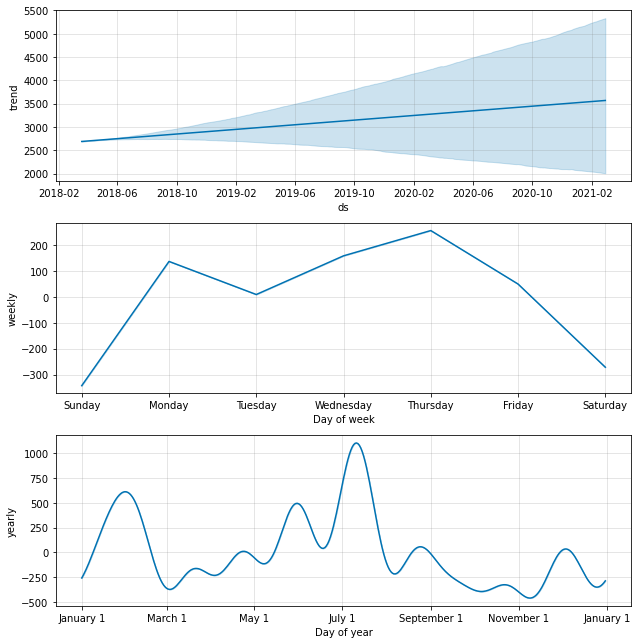

In [35]:
model.plot_components(forecast)
plt.show()

**Answer:**
July1 is the month of the yearly with seasonality that has the highest value

# **For Questions 17-19**

Multivariate Time Series Forecasting with Facebook Prophet

In the last exercise, we used only the dependent variable (ElecPrice) and the time component for our modeling (ds vs y). Next, we will build a time series model using the other variables. These variables will be added to the forecast model as a regressor on Facebook Prophet. So the 3 independent variables [‘SysLoad’,’Tmax’,’GasPrice’'] will be [‘add1’, ‘add2’, ‘add3’’] as the regressors. Split the data into train and test as done above and build a multivariate forecast model to forecast the last x-2757 days of ElecPrice. Answer question 17-19:

In [36]:
Electric_df_daily.head()

,FullDate,Tmax,SysLoad,GasPrice,ElecPrice
0,2010-09-01,379.2,41565.380,88.56,2751.700
1,2010-09-02,369.6,38898.990,88.56,570.810
2,2010-09-03,439.2,41665.760,106.80,504.975
3,2010-09-04,328.8,35638.085,81.36,502.275
4,2010-09-05,357.6,35611.410,106.80,500.555


In [48]:
Electric_df_daily.rename(columns = {'FullDate':'ds', 'ElecPrice':'y'}, inplace = True)

In [ ]:
#df_data = power_df_daily[['ds', 'y', 'SysLoad', 'Tmax', 'GasPrice']]

In [49]:
df_train = Electric_df_daily[['ds', 'SysLoad', 'Tmax', 'GasPrice', 'y']]

In [50]:
model2 = Prophet()
model2.add_regressor('SysLoad')
model2.add_regressor('Tmax')
model2.add_regressor('GasPrice')
model2.fit(df_train)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [51]:
# assign train and test data
train1 = df_train[:2757]
test1 = df_train[2757:]

In [52]:
df_test_pred = test1[['ds', 'SysLoad', 'Tmax', 'GasPrice']]
forecast2 = model2.predict(df_test_pred)

**Question 17**

Evaluating the results of your time series model on the test set, what is the MAPE (in %) in 2 decimal places?

In [53]:
from sklearn.metrics import mean_absolute_percentage_error

mape1 = mean_absolute_percentage_error(test1.y, forecast2.yhat) * 100
round(mape1,2)

104.96

What is the RMSE in 2 decimal places?

In [54]:
from sklearn.metrics import mean_squared_error
from math import sqrt

rms = sqrt(mean_squared_error(test1.y, forecast2.yhat))
round(rms,2)

2599.61

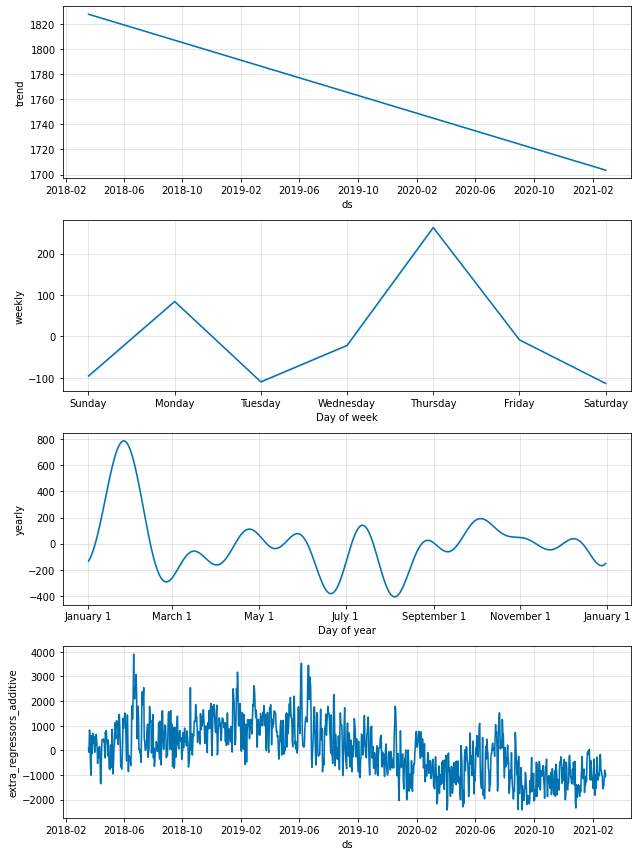

In [55]:
model2.plot_components(forecast2)
plt.show()